In [1]:
from pathlib import Path

from util import get_model_and_test_dataloader_from_configs, visualize_batched_segmentation_sample

## Load model for inference ##

In [2]:
!ls ../../config/model_configs/downstream_tasks/dfc_2020/segmentation/

dfc_2020_feature_extractor-lf-1.yaml   dfc_2020_feature_extractor.yaml
dfc_2020_feature_extractor-lf-10.yaml  segmentation.yaml
dfc_2020_feature_extractor-lf-50.yaml


In [3]:
backbone_config_path = Path("../../config/model_configs/downstream_tasks/dfc_2020/segmentation/dfc_2020_feature_extractor.yaml")
downstream_head_config_path = Path("../../config/model_configs/downstream_tasks/dfc_2020/segmentation/segmentation.yaml")
checkpoints_root_path = Path("../..")

In [4]:
pl_module, test_dataloader = get_model_and_test_dataloader_from_configs(
    backbone_config_path=backbone_config_path,
    downstream_head_config_path=downstream_head_config_path,
    checkpoints_root_path=checkpoints_root_path,
)

[Load]: 100%|█████████████████████████| 5128/5128 [00:00<00:00, 241501.79it/s]

loaded 5128 samples from the dfc2020 subset test


## Visualize DFC2020 results ##

In [5]:
from torch.utils.data import DataLoader
test_dataloader = DataLoader(
    dataset=test_dataloader.dataset,
    batch_size=3,
    shuffle=False,
)

In [9]:
count = 0
for batch in test_dataloader:
    count +=1
    if count == 3:
        break
batch["image"] = batch["image"].to(pl_module.device)
batch["label"] = batch["label"].to(pl_module.device)

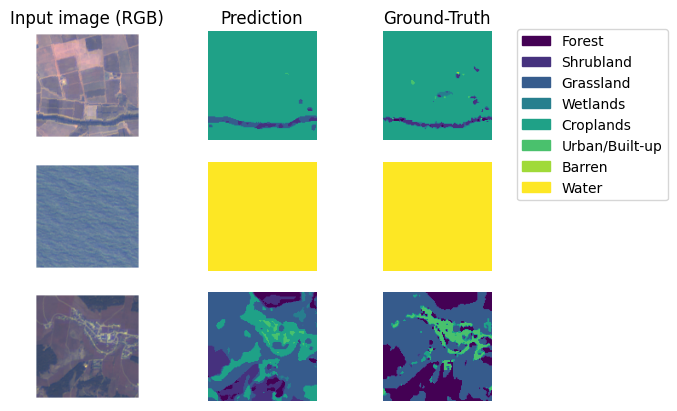

In [12]:
import matplotlib.pyplot as plt
DFC_MAP = {
    0: "Forest",
    1: "Shrubland",
    2: "Grassland",
    3: "Wetlands",
    4: "Croplands",
    5: "Urban/Built-up",
    6: "Barren",
    7: "Water",
    255: "Invalid",
}

visualize_batched_segmentation_sample(
    image=batch["image"], 
    y_hat=pl_module.downstream_model(batch), 
    y=batch["label"],
    dimming_factor=4.5,
    num_classes=8,
    value_to_class_mapping=DFC_MAP,
)

plt.savefig("./additional_dfc_2020_examples.png", dpi=300, bbox_inches="tight")